In [1]:
import pandas as pd

In [2]:
df =  pd.read_csv('data.csv', sep="\t",header=0)
df = df.drop(columns=['country', 'dateload','introelapse','testelapse','testelapse','engnat','surveyelapse'])
df

,Q1A,Q1I,Q1E,Q2A,Q2I,Q2E,Q3A,Q3I,Q3E,Q4A,...,Q89E,Q90A,Q90I,Q90E,Q91A,Q91I,Q91E,gender,age,IE
0,5,51,7107,3,91,2522,1,56,6180,2,...,11548,3,40,4648,3,35,4609,2,23,3
1,5,39,6354,5,13,3092,1,12,5243,5,...,2827,4,28,3884,3,1,10409,1,25,2
2,3,17,5397,4,35,2747,5,40,5262,3,...,3337,1,87,1759,1,19,2691,1,19,1
3,5,41,3055,2,14,3348,1,13,5141,1,...,3198,3,15,2345,3,23,3697,1,23,1
4,1,76,2542,2,54,1878,1,15,5637,1,...,4024,5,86,6413,5,69,1662,1,18,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7183,1,46,1328,4,82,3214,4,43,3360,5,...,3953,5,49,3608,4,62,3495,2,53,1
7184,2,5,8786,5,24,2233,5,10,10387,5,...,3483,3,76,2778,2,33,6088,1,20,1
7185,3,29,6618,5,44,2393,4,58,5768,5,...,3815,1,32,2345,1,21,3425,2,28,1
7186,4,15,8321,2,18,6179,5,60,5037,1,...,14867,5,78,1187,2,86,17416,2,19,1


In [3]:
def load_data():
    l = list(df)
    y = pd.DataFrame(df,columns=[l.pop()])
    q = []
    for i in l:
        if i[len(i)-1] == 'A':
            q.append(i)  
    x = pd.DataFrame(df,columns=q)
    return x[0:1000],y[0:1000]
    

     Q1A  Q2A  Q3A  Q4A  Q5A  Q6A  Q7A  Q8A  Q9A  Q10A  ...  Q82A  Q83A  Q84A  \
0      5    3    1    2    3    2    3    3    4     5  ...     1     3     2   
1      5    5    1    5    2    2    5    2    1     3  ...     1     2     2   
2      3    4    5    3    4    5    5    5    5     5  ...     5     5     5   
3      5    2    1    1    5    5    5    4    4     2  ...     5     5     5   
4      1    2    1    1    3    3    5    1    3     4  ...     2     3     1   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...   ...  ...   ...   ...   ...   
995    5    2    5    3    5    5    3    3    5     5  ...     5     5     5   
996    1    1    1    4    5    1    5    1    1     5  ...     1     1     1   
997    5    5    3    5    4    5    5    5    3     5  ...     3     3     5   
998    4    5    4    3    4    4    4    5    5     5  ...     5     5     5   
999    2    1    4    2    4    1    5    1    1     2  ...     1     1     1   

     Q85A  Q86A  Q87A  Q88A

[Text(0.53984375, 0.9642857142857143, 'X[90] <= 2.5\ngini = 0.553\nsamples = 1000\nvalue = [6, 602, 134, 258]'),
 Text(0.27877457865168537, 0.8928571428571429, 'X[81] <= 3.5\ngini = 0.358\nsamples = 618\nvalue = [3, 481, 17, 117]'),
 Text(0.12201544943820225, 0.8214285714285714, 'X[22] <= 2.5\ngini = 0.501\nsamples = 257\nvalue = [3, 163, 12, 79]'),
 Text(0.04269662921348315, 0.75, 'X[52] <= 2.5\ngini = 0.328\nsamples = 101\nvalue = [0, 81, 3, 17]'),
 Text(0.017977528089887642, 0.6785714285714286, 'X[89] <= 2.5\ngini = 0.537\nsamples = 18\nvalue = [0, 10, 1, 7]'),
 Text(0.008988764044943821, 0.6071428571428571, 'X[83] <= 2.5\ngini = 0.219\nsamples = 8\nvalue = [0, 7, 1, 0]'),
 Text(0.0044943820224719105, 0.5357142857142857, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1, 0]'),
 Text(0.01348314606741573, 0.5357142857142857, 'gini = 0.0\nsamples = 7\nvalue = [0, 7, 0, 0]'),
 Text(0.02696629213483146, 0.6071428571428571, 'X[89] <= 4.5\ngini = 0.42\nsamples = 10\nvalue = [0, 3, 0, 7]'),
 Text(

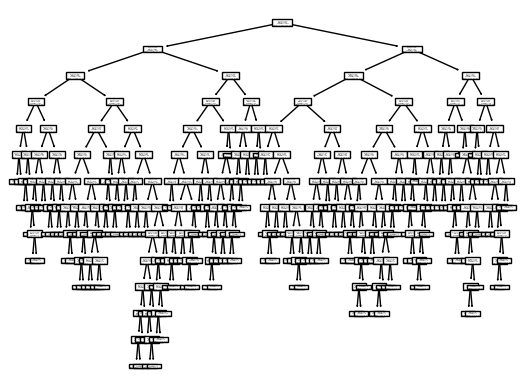

In [4]:
from sklearn import tree
X, y = load_data()
print(X)
print(y)
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)
tree.plot_tree(clf)

In [5]:
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_90 <= 2.50
|   |--- feature_81 <= 3.50
|   |   |--- feature_22 <= 2.50
|   |   |   |--- feature_52 <= 2.50
|   |   |   |   |--- feature_89 <= 2.50
|   |   |   |   |   |--- feature_83 <= 2.50
|   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |--- feature_83 >  2.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_89 >  2.50
|   |   |   |   |   |--- feature_89 <= 4.50
|   |   |   |   |   |   |--- feature_51 <= 1.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_51 >  1.50
|   |   |   |   |   |   |   |--- class: 3
|   |   |   |   |   |--- feature_89 >  4.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |--- feature_52 >  2.50
|   |   |   |   |--- feature_43 <= 2.50
|   |   |   |   |   |--- feature_34 <= 3.50
|   |   |   |   |   |   |--- feature_68 <= 4.50
|   |   |   |   |   |   |   |--- feature_65 <= 3.50
|   |   |   |   |   |   |   |   |--- class: 3
|   |   |   |   |   |   |   |--- feature_65 >  3.50
|   |   |   

In [6]:
questions = {
 "Q1" : "I would never audition to be on a game show.",
 "Q2" : "I am not much of a flirt.",
 "Q3" : "I have to psych myself up before I am brave enough to make a phone call.",
 "Q4" : "I would hate living with room mates.",
 "Q5" : "I mostly listen to people in conversations.",
 "Q6" : "I reveal little about myself.",
 "Q7" : "I spend hours alone with my hobbies.",
 "Q8" : "I prefer to eat alone.",
 "Q9" : "I have trouble finding people I want to be friends with.",
 "Q10" : "I prefer to socialize 1 on 1, than with a group.",
 "Q11" : "I sometimes speak so quietly people sometimes have trouble hearing me.",
 "Q12" : "I do not like to get my picture taken.",
 "Q13" : "I can keep a conversation going with anyone about anything.",
 "Q14" : "I want a huge social circle.",
 "Q15" : "I talk to people when waiting in lines.",
 "Q16" : "I act wild and crazy.",
 "Q17" : "I am a bundle of joy.",
 "Q18" : "I love excitement.",
 "Q19" : "I'd like to be in a parade.",
 "Q20" : "I am a flamboyant person.",
 "Q21" : "I am good at making impromptu speeches.",
 "Q22" : "I naturally emerge as a leader.",
 "Q23" : "I am spontaneous.",
 "Q24" : "I would enjoy being a sports team coach.",
 "Q25" : "I have a strong personality.",
 "Q26" : "I am excited by many different activities.",
 "Q27" : "I spend most of my time in fantasy worlds.",
 "Q28" : "I often feel lucky.",
 "Q29" : "I don't make eye contact when I talk with people.",
 "Q30" : "I have a monotone voice.",
 "Q31" : "I am a touchy feely person.",
 "Q32" : "I would like to try bungee jumping.",
 "Q33" : "I tend to be admired by others.",
 "Q34" : "I make big physical movements whenever I get excited.",
 "Q35" : "I am brave.",
 "Q36" : "I am always in the moment.",
 "Q37" : "I am involved with my community.",
 "Q38" : "I am good an entertaining children.",
 "Q39" : "I like formal occasions.",
 "Q40" : "I would have to be lost for a very long time before asking help.",
 "Q41" : "I do not care about sports.",
 "Q42" : "I prefer individual sports to team sports.",
 "Q43" : "My parents know nothing about my love life.",
 "Q44" : "I mostly listen to people in conversations.",
 "Q45" : "I never leave the door to my room open.",
 "Q46" : "I make a lot of hand motions when I talk.",
 "Q47" : "I take lots of pictures of my activities.",
 "Q48" : "When I was a child, I put on fake concerts and plays with my friends.",
 "Q49" : "I really like dancing.",
 "Q50" : "I would have difficulty describing myself to someone.",
 "Q51" : "My life would not make a good story.",
 "Q52" : "I am hesitant to give suggestions.",
 "Q53" : "I tire out quickly.",
 "Q54" : "I never tell people the important things about myself.",
 "Q55" : "I avoid going to unknown places.",
 "Q56" : "Going to the doctor is always awkward for me.",
 "Q57" : "I have not kept up with my old friends over the years.",
 "Q58" : "I have not been joyful for quite some time.",
 "Q59" : "I hate to ask for help.",
 "Q60" : "If I were to die, I would not want there to be a memorial for me.",
 "Q61" : "I hate shopping.",
 "Q62" : "I love to do impressions.",
 "Q63" : "I would be pleased if asked to speak at a funeral.",
 "Q64" : "I would never go to a dance club.",
 "Q65" : "I find it very hard to tell people I find them attractive.",
 "Q66" : "I hate people.",
 "Q67" : "I was an outcast in school.",
 "Q68" : "I would enjoy being a librarian.",
 "Q69" : "I am usually not single.",
 "Q70" : "I am able to stand up for myself.",
 "Q71" : "I would go surfing regularly if I lived on a beach.",
 "Q72" : "I have wanted to be a stand-up comedian.",
 "Q73" : "I am a high status person.",
 "Q74" : "I work out regularly.",
 "Q75" : "I laugh a lot.",
 "Q76" : "I like pranks.",
 "Q77" : "I am happy with my life.",
 "Q78" : "I am never at a loss for words.",
 "Q79" : "I feel healthy and vibrant most of the time.",
 "Q80" : "I love large parties.",
 "Q81" : "I am quiet around strangers.",
 "Q82" : "I don't talk a lot.",
 "Q83" : "I keep in the background.",
 "Q84" : "I don't like to draw attention to myself.",
 "Q85" : "I have little to say.",
 "Q86" : "I often feel blue.",
 "Q87" : "I am not really interested in others.",
 "Q88" : "I make people feel at ease.",
 "Q89" : "I don't mind being the center of attention.",
 "Q90" : "I start conversations.",
 "Q91" : "I talk to a lot of different people at parties."
}

In [7]:
import numpy as np

In [8]:
from sklearn.tree import _tree

def tree_to_code(tree, feature_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]
    execution_order = []
    inputs = []
    def recurse(node, depth):
        indent = "    " * depth
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            q =  name.replace('Q','')
            q =  q.replace('A','')
            execution_order.append(q)
            q = ""
            threshold = tree_.threshold[node]
            inp = float(input(questions[name[:-1]] + " : "))
            inputs.append(inp)
            value = "{} <= {}".format(inp,np.round(threshold,2))
            if eval(value):
                return recurse(tree_.children_left[node], depth + 1)
            else:
                return recurse(tree_.children_right[node], depth + 1)
            
        else:
            return tree_.value[node][0]
    node = recurse(0, 1)
    return execution_order,inputs


In [15]:
print("Enter 1=Disagree, 2=Slightly disagree, 3=Neutral, 4=Slightly agree, 5=Agree")
l = list(df)
y = pd.DataFrame(df,columns=[l.pop()])
q = []
for i in l:
    if i[len(i)-1] == 'A':
        q.append(i)  
order,ins = tree_to_code(clf,q)
k = [0] * 91
j = 0
for i in order:
    k[int(i)-1] = ins[j]
    j += 1
index  = clf.predict([k], check_input=True)[0]
if index == 3:
    print("----------- You are Ambivert ------------")
if index == 1:
    print("----------- You are Introvert ------------")
if index == 2:
    print("----------- You are Extrovert ------------")

Enter 1=Disagree, 2=Slightly disagree, 3=Neutral, 4=Slightly agree, 5=Agree
I talk to a lot of different people at parties. : 3
I start conversations. : 4
I don't mind being the center of attention. : 3
I have trouble finding people I want to be friends with. : 1
I tend to be admired by others. : 3
I would go surfing regularly if I lived on a beach. : 1
I naturally emerge as a leader. : 3
I do not like to get my picture taken. : 3
----------- You are Introvert ------------


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
